# Datenanalyse des "Library Collection Inventory" Datenset der Seattle Public Library

## Beschreibung des Datensets

Für die Datenananlyse wurde das "Library Collection Inventory" Datenset der Seattle Public Library ausgewählt. Das Datenset enthält Daten zu allen physischen Objekten der Seattle Public Library. Es sind insgemsamt 13 Spalten vorhanden, welche unter anderem Informationen zu Titel, Autor, ISBN, Erscheinungsjahr, spezifische thematische Schlagwörter, welche für ein Objekt vergeben worden sind und Informationen über den Standort eines Objekts enthalten.

## Fragestellungen

Es werden in der folgenden Analyse drei Fragestellungen/Hypothesen untersucht: 

1) Wie viele Objekte „schweben“ zur Zeit der letzten Momentaufnahme?

2) Wie viele Objekte gibt es zum Thema Computer Programming? 

3) Histogramm Publication Year: In welchem Jahr sind die meisten physischen Objekte in der Seattle Public Library erschienen?

## Datenanalyse

In [6]:
# Zunächst werden die Pakete "pandas", "seaborn" sowie "matplotlib.pyplot" importiert.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
url = "https://data.seattle.gov/resource/6vkj-f5xf.csv"
spl = pd.read_csv(url)

In [8]:
spl

,bibnum,title,author,isbn,publicationyear,publisher,subjects,itemtype,itemcollection,floatingitem,itemlocation,reportdate,itemcount
0,106278,The Sporting news' national football guide.,NaN,NaN,NaN,Sporting News.,Football United States History Periodicals,arbk,cs8r,NaN,cen,2017-09-01T00:00:00.000,1
1,442617,NaN,NaN,NaN,NaN,NaN,NaN,acmus,camus,NaN,cen,2017-09-01T00:00:00.000,1
2,2748722,You can get there from here : my journey from ...,"Knowling, Bob","1591844223, 9781591844228",2011.,"Portfolio/Penguin,","Knowling Bob, African American businesspeople ...",acbk,naaanf,NaN,dth,2017-09-01T00:00:00.000,1
3,2881800,Naomi [sound recording] / the Cave Singers.,Cave Singers,NaN,p2013.,"Jagjaguwar,","Popular music 2011 2020, Rock music 2011 2020",accd,naover,NaN,gwd,2017-09-01T00:00:00.000,1
4,3181907,Bilgewater / Jane Gardam.,"Gardam, Jane","160945331X, 9781609453312",2016.,"Europa Editions,","Teenage girls Fiction, Teenagers Fiction, Boar...",acbk,nafic,NaN,qna,2017-09-01T00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2035646,Friedrich Hayek : a biography / Alan Ebenstein.,"Ebenstein, Alan O.",0312233442,2001.,"St. Martin's Press,",Hayek Friedrich A von Friedrich August 1899 19...,acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
996,3181802,The young Messiah [videorecording] / Focus Fea...,NaN,NaN,2016.,"Universal Pictures Home Entertainment,","Jesus Christ Drama, Feature films, Religious f...",acdvd,nadvd,Floating,dlr,2017-09-01T00:00:00.000,2
997,3042073,In the company of Sherlock Holmes : stories in...,NaN,"1605986585, 9781605986586",2014.,"Pegasus Crime,","Holmes Sherlock Fiction, Watson John H Fictiti...",acbk,namys,Floating,mon,2017-09-01T00:00:00.000,1
998,2959621,The food parade : healthy eating with the nutr...,"Castaldi, Elicia","0805091769, 9780805091762",2013.,"Christy Ottaviano Books, Henry Holt and Company,","Diet Juvenile fiction, Children Nutrition Juve...",jcbk,ncnf,NaN,dth,2017-09-01T00:00:00.000,1


Das Datenset wurde nicht vollständig importiert. Das originale Datenset enthält 66,2 Millionen Zeilen. Im Folgenden werden nur die übernommen 1000 Zeilen betrachtet.

## Fragestellung 1
#### Wie viele Objekte „schweben“ zur Zeit der letzten Momentaufnahme?

In [11]:
spl["floatingitem"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995         NaN
996    Floating
997    Floating
998         NaN
999         NaN
Name: floatingitem, Length: 1000, dtype: object

In [12]:
spl.floatingitem.describe()

count          145
unique           1
top       Floating
freq           145
Name: floatingitem, dtype: object

Innerhalb der Variable "floatingitem" sind nur zwei Werte vertreten: "NaN" und "Floating". Mithilfe der Funktion "describe()" konnte herausgefunden werden, dass 145 der 1000 Objekte sich im Status "Floating" befinden. 

## Fragestellung 2
#### Wie viele physische Objekte gibt es zum Thema Computer Programming? 

In [13]:
spl["subjects"]

0             Football United States History Periodicals
1                                                    NaN
2      Knowling Bob, African American businesspeople ...
3          Popular music 2011 2020, Rock music 2011 2020
4      Teenage girls Fiction, Teenagers Fiction, Boar...
                             ...                        
995    Hayek Friedrich A von Friedrich August 1899 19...
996    Jesus Christ Drama, Feature films, Religious f...
997    Holmes Sherlock Fiction, Watson John H Fictiti...
998    Diet Juvenile fiction, Children Nutrition Juve...
999    DeMarco Joe Fictitious character Fiction, Gove...
Name: subjects, Length: 1000, dtype: object

In [14]:
spl.subjects.describe()

count                      951
unique                     927
top       Rock music 2011 2020
freq                         7
Name: subjects, dtype: object

Innerhalb der 1000 Objekte sind für 951 Daten innerhalb der Variable Subjects hinterlegt. Wie zu erwarten handelt es sich größtenteils um unterschiedliche Inhalte. Der Inhalt/das Thema das am häufigsten vorkommt (7-mal) ist "Rock music 2011 2020".
Im Folgenden soll untersucht werden, wie viele Werke der 1000 untersuchten Objekte das Thema "Computer Programming" behandeln.

Idee: for-Schleife, die den gesamten Datensatz durchläuft und für jede Zeile untersucht, ob der String "Computer Programming" im Feld subjects vorhanden ist. 
Um zu überprüfen, ob der String "Computer Programming" in subjects vorhanden ist, soll die Methode "__contains__" verwendet werden.

#### Testen der Methode contains

In [15]:
spl.subjects[0]

'Football United States History Periodicals'

In [16]:
spl.subjects[0].__contains__("Football")

True

In [17]:
spl.subjects[0].__contains__("Computer Programming")

False

Die Methode contains gibt einen Wahrheitswert zurück. Wenn der übergebene String im zu untersuchenden String enthalten ist, wird True zurückgegeben, ist dies nicht der Fall wird False zurückgegeben. 

In [18]:
spl.subjects[1].__contains__("Computer Programming")

AttributeError: 'float' object has no attribute '__contains__'

In der zweiten Zeile des Datensatzes befindet sich ein Eintrag, für den kein Subject, also der Wert NaN hinterlegt ist. Auf diesen kann die Funktion "contains" nicht angewendet werden. 

In [30]:
type(subjects[0])

str

In [31]:
type(subjects[1])

float

Mithilfe der Methode type konnte herausgefunden werden, dass die Datensätze, in denen unter subjects Daten hinterlegt sind, vom Typ String sind, während Daten, in denen keine Daten, also NaN hinterlegt ist, vom Typ float sind. 

In [32]:
# Mithilfe der Methode str kann der Typ float in einen String umgewandelt werden.
type(str(subjects[1]))

str

In [33]:
str(subjects[1]).__contains__("Football")

False

In [34]:
str(subjects[1]).__contains__("nan")

True

Mithilfe der Methode str kann die Methode contains nun auch auf die Datensätze angewendet werden, für die keine Daten im Feld subjects hinterlegt sind.

In [24]:
# Um mit den subjects arbeiten zu können, müssen diese außerdem in ein Dictionary umgewandelt werden.
# In der Variable Subjects wird der Inhalt der Spalte subjects aus dem Ausgangsdatensatz als Dictionary abgelegt.
subjects = dict(spl.subjects)

In [25]:
# Ausgabe des Dictionary subjects. Der Übersichtlichkeit halber werden nur die ersten 10 Zeilen ausgegeben.
for i in subjects:
    print(subjects[i])
    if i >=9:
        break

Football United States History Periodicals
nan
Knowling Bob, African American businesspeople Biography, Success in business
Popular music 2011 2020, Rock music 2011 2020
Teenage girls Fiction, Teenagers Fiction, Boarding schools Fiction, Identity Psychology Fiction, England Fiction, Bildungsromans
nan
nan
United States Federal Bureau of Investigation Drama, FBI Academy Behavioral Science Unit Drama, Criminal investigation Drama, Criminal behavior Prediction of Drama, Criminal profilers Drama, Television series, Fiction television programs, Television cop shows, Thrillers Television programs, Video recordings for the hearing impaired
Cosby Bill 1937, Comedians United States Biography
Aliksandrina Library History Juvenile literature, Libraries Egypt Alexandria Juvenile literature, Libraries Destruction and pillage Egypt Alexandria Juvenile literature, Cultural property Protection Juvenile literature, Egypt History 21st century Juvenile literature, Aliksandrina Library Juvenile literature

### for-Schleife

In [26]:
# Es wird eine leere Liste namens ergebnis_computer_programming erzeugt. 
ergebnis_computer_programming = []

# Die for-Schleife durchläuft das Dictionary subjects. Wenn der String "Computer Programming" in einer Zeile enthalten ist, 
# wird dies in der Ergebnisliste gespeichert. Die Länge der Ergebnisliste wird ausgegeben.
for i in subjects:
    if str(subjects[i]).__contains__("Computer Programming"):
        ergebnis_computer_programming.append(i)
print(len(ergebnis_computer_programming))

0


In der Liste sind keine Elemente enthalten. In dem Beispieldatensatz gibt es also kein Werk, welches mit dem Subject "Computer Programming" gekennzeichnet ist. Ich starte nochmal einen neuen Versuch mit dem Term "Football". 

In [27]:
ergebnis_football = []

for i in subjects:
    if str(subjects[i]).__contains__("Football"):
        ergebnis_computer_programming.append(i)
print(len(ergebnis_computer_programming))

2


Zwei der 1000 betrachteten Datensätze enthalten das Thema "Football" innerhalb der Kategorie subjects. Die zu Beginn formulierte Fragestellung ist somit beantwortet. Im Folgenden soll noch eine Funktion implementiert werden, an die ein beliebiger String übergeben werden kann und die dann überprüft in wie vielen der hier betrachteten Datensätze dieser String enthalten ist. 

### Implementieren der Funktion

In [28]:
def how_many_books_concerning(subject):
    print ("Diese Funktion gibt aus wie viele physische Objekte es zu einem Thema gibt.")
    ergebnis = []
    for i in subjects:
        if str(subjects[i]).__contains__(subject):
            ergebnis.append(i)
    print(len(ergebnis))

In [29]:
how_many_books_concerning("Football")

Diese Funktion gibt aus wie viele physische Objekte es zu einem Thema gibt.
2


In [35]:
how_many_books_concerning("Computer Programming")

Diese Funktion gibt aus wie viele physische Objekte es zu einem Thema gibt.
0


In [36]:
how_many_books_concerning("Computer")

Diese Funktion gibt aus wie viele physische Objekte es zu einem Thema gibt.
2


In [38]:
how_many_books_concerning("Rock music")

Diese Funktion gibt aus wie viele physische Objekte es zu einem Thema gibt.
27


Nun kann für jedes beliebige Thema ausgegeben werden, wie viele physische Medien die Seattle Public Library zu diesem Thema besitzt (hier leider nur beispielhaft für den verwendenten Datensatz mit 1000 Zeilen). 

## Fragestellung 3
#### Aus welchem Jahr stammen die meisten der vorhandenen physischen Objekte?
Im Folgenden  soll untersucht werden, wie viele Objekte in welchem Jahr erschienen sind und aus welchem Erscheinungsjahr die meisten Objekte vorhanden sind. Dazu soll ein Histogramm der Erscheinungsjahre ("publicationyear") erstellt werden. Hierbei ist zu berücksichtigen, dass die Fragestellung nicht eindeutig beantwortet werden kann, da nur 1000 der insgesamt 66,2 Millionen Zeilen betrachtet werden. Es kann aber eine Idee über die Verteilung der Erscheinungsjahre gewonnen werden. 

In [39]:
spl["publicationyear"]

0         NaN
1         NaN
2       2011.
3      p2013.
4       2016.
        ...  
995     2001.
996     2016.
997     2014.
998     2013.
999    [2015]
Name: publicationyear, Length: 1000, dtype: object

Es fällt auf, dass es schwierig wird, die Daten zu visualisieren, da die Erscheinungsjahre als "Plain Text" abgelegt sind. Für einige Objekte ist kein Erscheinungsjahr vorhanden (NaN), es steht ein Buchstabe davor (p2013.) oder das Erscheinungsjahr ist geklammert ([2015]).

In [40]:
spl.publicationyear.describe()

count        974
unique       245
top       [2016]
freq          54
Name: publicationyear, dtype: object

Eine Beschreibung des Datensets ergibt, dass für 974 der 1000 Objekte ein Erscheinungsjahr hinterlegt ist. Insgesamt stammen die Objekte aus 245 verschiedenen Erscheinungsjahren.
Um eine Antwort auf die Fragestellung zu finden, müssen die Daten als integer und nicht als PlainText vorliegen.

## Fragestellung 4
#### Wie viele Exemplare gibt es durchschnittlich von einem Medium?

Um diese Frage zu beantworten, ist die Spalte ItemCount relevant, in welcher die Anzahl der Objekte in der jeweiligen Sammlung oder Kollektion angegeben ist. 

In [41]:
spl.itemcount.describe()

count    1000.000000
mean        1.221000
std         2.269209
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        71.000000
Name: itemcount, dtype: float64

Die 1000 betrachteten Objekte sind im Durchschnitt (arithmetisches Mittel) 1,22-Mal vorhanden. Es gibt einen Ausreißer, welcher 71x vorhanden ist. 

## Fragestellung 5 + Hinzufügen des Datensets 'Checkout by Title'
#### Welches Buch wurde am häufigsten ausgeliehen?

Im Folgenden interessiert mich die Fragestellung, welches Buch am häufigsten ausgeliehen worden ist. Um diese Fragestellung beantworten zu können, importiere ich zusätzlich zum Library Collection Inventory Datenset der Seattle Public Library das Checkouts by Title Set der Seattle Public Library.

In [43]:
# Import des Datensets 'Checkout by Title'
url_title = "https://data.seattle.gov/resource/tmmm-ytt6.csv"
spl_title = pd.read_csv(url_title)

In [44]:
spl_title

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2012,5,2,The ballad of Grégoire Darcy : Jane Austen's P...,"Altman, Marsha",Darcy Fitzwilliam Fictitious character Fiction...,Ulysses Press : Distributed by Publishers Grou...,c2011.
1,Physical,Horizon,SOUNDDISC,2012,5,1,"Bicentenario, 1810/1910/2010 [sound recording]...","Aguilar, Pepe","Popular music Mexico 2001 2010, Songs Spanish ...","Vene/Universal Music Latino,",p2010.
2,Physical,Horizon,VIDEODISC,2012,5,2,Thomas Jefferson,NaN,"Jefferson Thomas 1743 1826, Presidents United ...",NaN,NaN
3,Physical,Horizon,BOOK,2012,5,1,Clifford the big red dog the big leaf pile,NaN,"Dogs Fiction, Leaves Fiction",NaN,NaN
4,Physical,Horizon,BOOK,2012,5,15,"My book about me, by me myself. I wrote it! I ...","Seuss, Dr.",Childrens questions and answers,Beginner Books,[1969]
...,...,...,...,...,...,...,...,...,...,...,...
995,Physical,Horizon,BOOK,2012,5,5,Angeltown : the Nate Hollis investigations / [...,"Phillips, Gary, 1955-","Private investigators Comic books strips etc, ...","Moonstone Entertainment,",c2011.
996,Physical,Horizon,BOOK,2012,5,3,Day of the oprichnik / Vladimir Sorokin ; tran...,"Sorokin, Vladimir, 1955-",Black humor Literature,"Farrar, Straus and Giroux,",2011.
997,Physical,Horizon,BOOK,2012,5,3,How we age : a doctor's journey into the heart...,"Agronin, Marc E.","Older people, Nursing home patients Florida Mi...","Da Capo Press,",c2011.
998,Digital,Freegal,SONG,2012,5,1,Yank Me Crank Me,Ted Nugent,NaN,NaN,NaN


Für die folgende Analyse muss beachtet werden, dass die Auswertung nur für die hier vorliegende Stichprobe von 1000 Objekten zutreffend ist. 

In [45]:
spl_title.checkouts.describe()

count    1000.000000
mean        3.403000
std         7.316155
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       181.000000
Name: checkouts, dtype: float64

<AxesSubplot:>

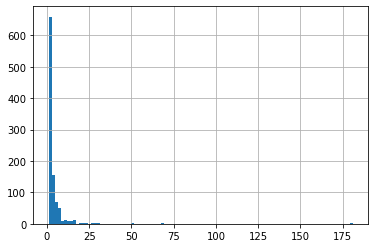

In [49]:
spl_title.checkouts.hist(bins=100)

Innerhalb der 1000 hier betrachteten Objekte wurde ein Medium im Durchschnitt 3,4-Mal ausgeliehen. Der Median beträgt 2. Das häufigste Medium wurde 181-Mal ausgeliehen. 
Anhand des erzeugten Histogramms lässt sich erkennen, der Großteil der Medien (über 600) nur einmal ausgeliehen worden sind. Das Medium, welches 181-Mal ausgeliehen worden ist, stellt einen absoluten Ausreißer dar. 
Im Folgenden soll herausgefunden werden, wie der Titel dieses Mediums lautet.

In [50]:
type(spl_title.checkouts)

pandas.core.series.Series

Um mit der Spalte Checkouts arbeiten zu können, muss diese zunächst in ein Dictionary umgewandelt werden. 

In [51]:
checkouts = dict(spl_title.checkouts)

In [53]:
for i in checkouts:
    if str(checkouts[i]).__contains__("181"):
        print(spl_title.title[i])

Hanna [videorecording] / Focus Features ; produced by Leslie Holleran, Marty Adelstein, Scott Nemes ; screenplay by Seth Lochhead and David Farr ; story by Seth Lochhead ; directed by Joe Wright.


Der Titel des Buches, welches am häufigsten ausgliehen worden ist, lautet: "Hanna [videorecording] / Focus Features ; produced by Leslie Holleran, Marty Adelstein, Scott Nemes ; screenplay by Seth Lochhead and David Farr ; story by Seth Lochhead ; directed by Joe Wright."

# Diskussion

Dadurch, dass der Großteil der Daten im PlainText Format vorliegt, war es recht schwierig mit den Daten zu arbeiten. Visualisierungen im Hinblick auf die Erscheinungsjahre wäre möglich gewesen, wenn die Erscheinungsjahre im Datentyp Integer vorgelegen hätten. 